<div Style="text-align: center;line-height: 30px;font-size:32px;font-weight: bold"> Data Augmentation</div>
***

In [340]:
%matplotlib inline
import numpy as np
from skimage import io
from skimage.transform import rotate, rescale, resize
import matplotlib.pyplot as plt

# 1. Cambios de tamaño en la imagen

Debemos de tener en cuenta que en todos los cambios que realicemos sobre un imagen, tendremos que cambiar las coordenadas de las etiquetas realizadas.

En este caso, debemos de rescalar las coordenadas proporcionalmente al factor de rescalado.

In [341]:
import warnings
warnings.filterwarnings('ignore')

original_img = io.imread("..\\..\\doc\\img\\2.jpg")

# Factores de rescalado
factors = [0.6, 0.8, 1.2]

# Coordenadas ejemplo
coords = [[5,5,30,30],[50,90,90,10],[10,10,30,50],[250,300,10,40]]

## 1.1. Rescalado en los dos ejes

In [342]:
r_imgs = []
r_imgs.append(rescale(original_img, factors[0]))
r_imgs.append(rescale(original_img, factors[1]))
r_imgs.append(rescale(original_img, factors[2]))

In [343]:
def rescale_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        rescale_coords.append([c * factor for c in coord])
    return rescale_coords

In [344]:
rescale_c = []
rescale_c.append(rescale_coords(coords, factors[0]))
rescale_c.append(rescale_coords(coords, factors[1]))
rescale_c.append(rescale_coords(coords, factors[2]))

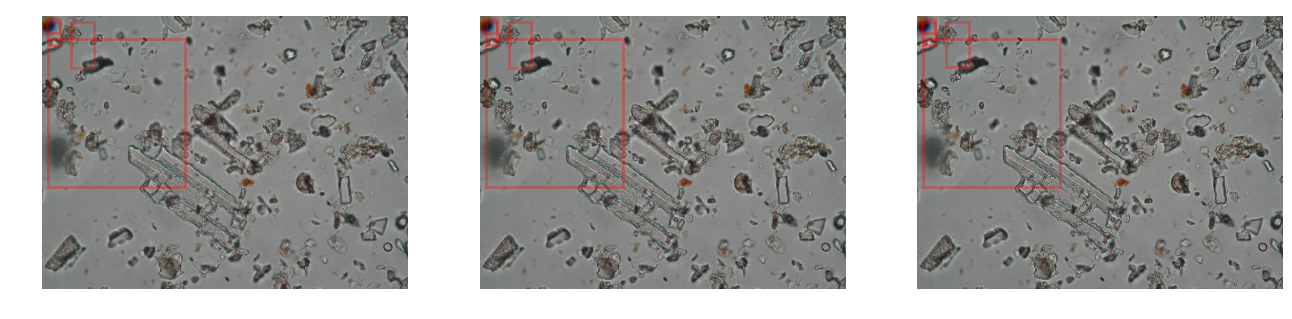

In [345]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_imgs[i])
    ax.axis('off')
    for coord in rescale_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

## 1.2. Rescalado en el eje horizontal

In [346]:
def rescale_one_image_axis(image, factor, axis=0):
    h, w = image.shape[:2]
    
    if axis == 0:
        w = w * factor
    elif axis == 1:
        h = h * factor
    else:
        raise "Axis should be equalts to 0 o 1"
    
    return resize(image,(h,w))

In [347]:
r_h_imgs = []
r_h_imgs.append(rescale_one_image_axis(original_img, factors[0]))
r_h_imgs.append(rescale_one_image_axis(original_img, factors[1]))
r_h_imgs.append(rescale_one_image_axis(original_img, factors[2]))

In [348]:
def rescale_h_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        r_coord = coord
        r_coord[0] = r_coord[0] * factor
        r_coord[2] = r_coord[2] * factor
        rescale_coords.append(r_coord)
    return rescale_coords

In [349]:
rescale_h_c = []
rescale_h_c.append(rescale_h_coords(coords, factors[0]))
rescale_h_c.append(rescale_h_coords(coords, factors[1]))
rescale_h_c.append(rescale_h_coords(coords, factors[2]))

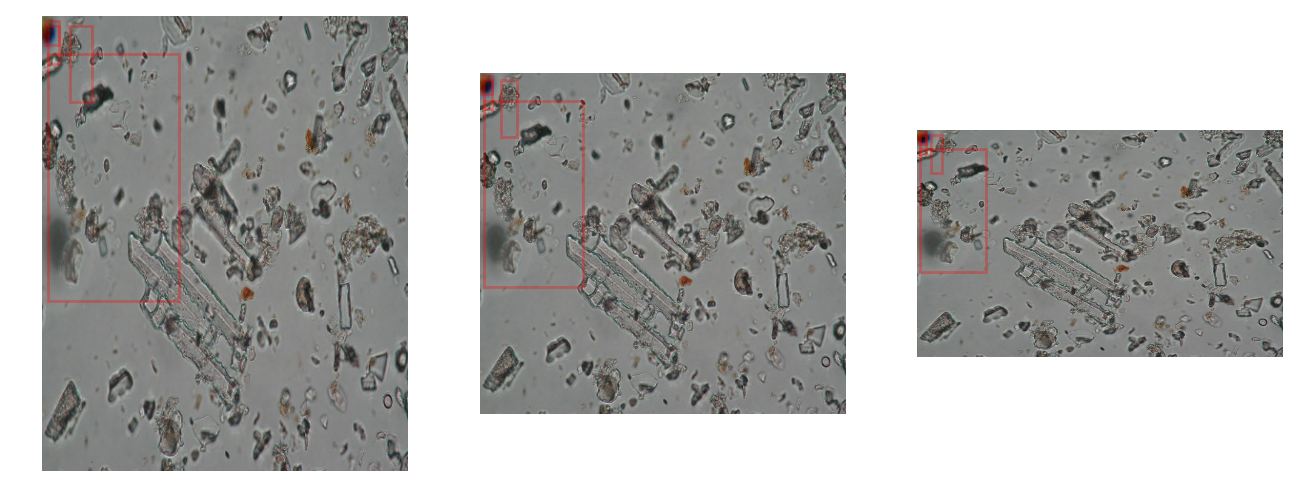

In [350]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_h_imgs[i])
    ax.axis('off')
    for coord in rescale_h_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

## 1.3. Rescalado en el eje vertical

In [351]:
r_v_imgs = []
r_v_imgs.append(rescale_one_image_axis(original_img, factors[0],1))
r_v_imgs.append(rescale_one_image_axis(original_img, factors[1],1))
r_v_imgs.append(rescale_one_image_axis(original_img, factors[2],1))

In [352]:
def rescale_v_coords(coords, factor):
    rescale_coords = []
    for coord in coords:
        r_coord = coord
        r_coord[1] = r_coord[1] * factor
        r_coord[3] = r_coord[3] * factor
        rescale_coords.append(r_coord)
    return rescale_coords

In [353]:
rescale_v_c = []
rescale_v_c.append(rescale_v_coords(coords, factors[0]))
rescale_v_c.append(rescale_v_coords(coords, factors[1]))
rescale_v_c.append(rescale_v_coords(coords, factors[2]))

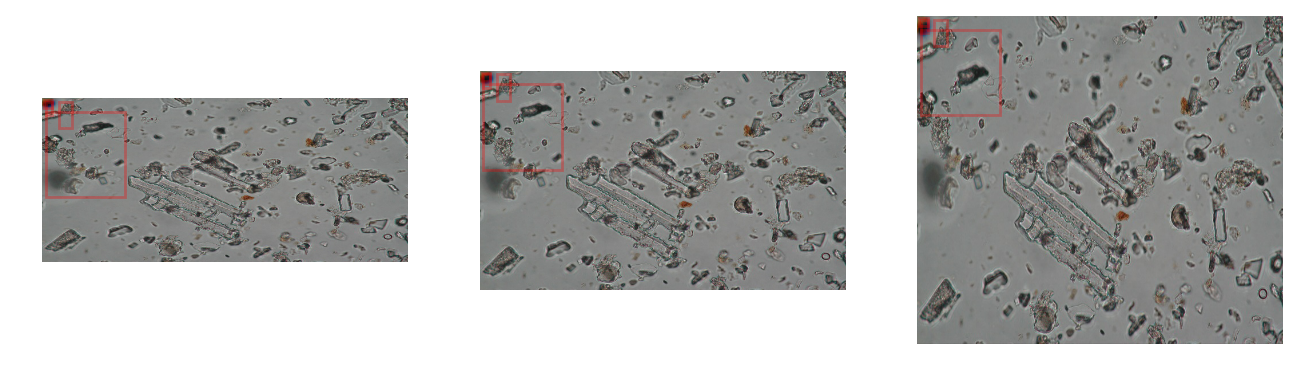

In [354]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=3, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(r_v_imgs[i])
    ax.axis('off')
    for coord in rescale_v_c[i]:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                   alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 2. Espejar imágenes

In [355]:
flipped_imgs = []

# Damos la vuelta a la imagen en el eje vertical
flipped_imgs.append(np.flipud(original_img))

# Damos la vuelta a la imagen en el eje horizontal
flipped_imgs.append(np.fliplr(original_img))

In [356]:
def flipud_coords(img_h, img_w, coords):
    flipped_coords = []
    for coord in coords:
        
        height = coord[3] - coord[1]
        
        y2 = img_h - coord[1]
        y = y2 - height
        
        flipped_coords.append([coord[0],y,coord[2],y2])
    return flipped_coords

In [357]:
f_coords = flipud_coords(original_img.shape[0], original_img.shape[1], coords)

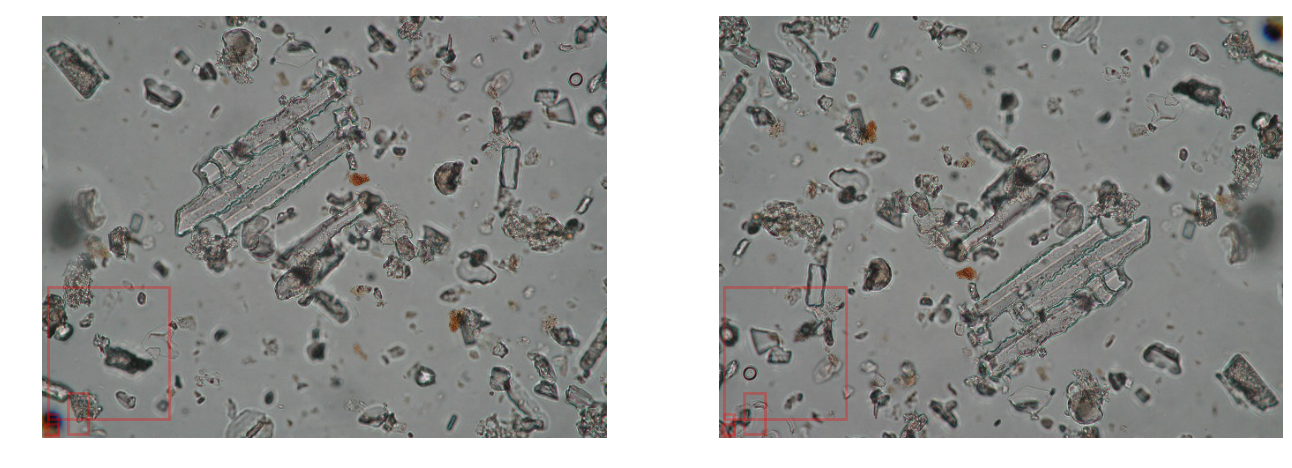

In [358]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols=2, figsize=(16, 16), subplot_kw={'adjustable':'box-forced'})

i=0
for ax in axes:

    ax.imshow(flipped_imgs[i])
    ax.axis('off')

    for coord in f_coords:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                  alpha=0.3, lw=2, facecolor='none'))
    i += 1

# 2. Ruido en las imágenes

In [359]:
from skimage.util import random_noise

In [362]:
noise_imgs = []

# Valores por defecto mode='gaussian'
# mean = 0, var = 0.01
# amount = 0.05, salt_vs_pepper = 0.5

noise_imgs.append(random_noise(original_img,mode="gaussian", mean=0, var=0.01))
noise_imgs.append(random_noise(original_img,mode="pepper", amount=0))
# Se puede utilizar el parametro local_vars a modo de matriz
# para indicar la varianza local en cada pixel, para el modo "localvar"
noise_imgs.append(random_noise(original_img,mode="localvar"))
noise_imgs.append(random_noise(original_img,mode="poisson"))
noise_imgs.append(random_noise(original_img,mode="salt", amount=0.05))
noise_imgs.append(random_noise(original_img,mode="s&p", amount=0.05, salt_vs_pepper=0.5))
noise_imgs.append(random_noise(original_img,mode="speckle", mean=0, var=0.1))

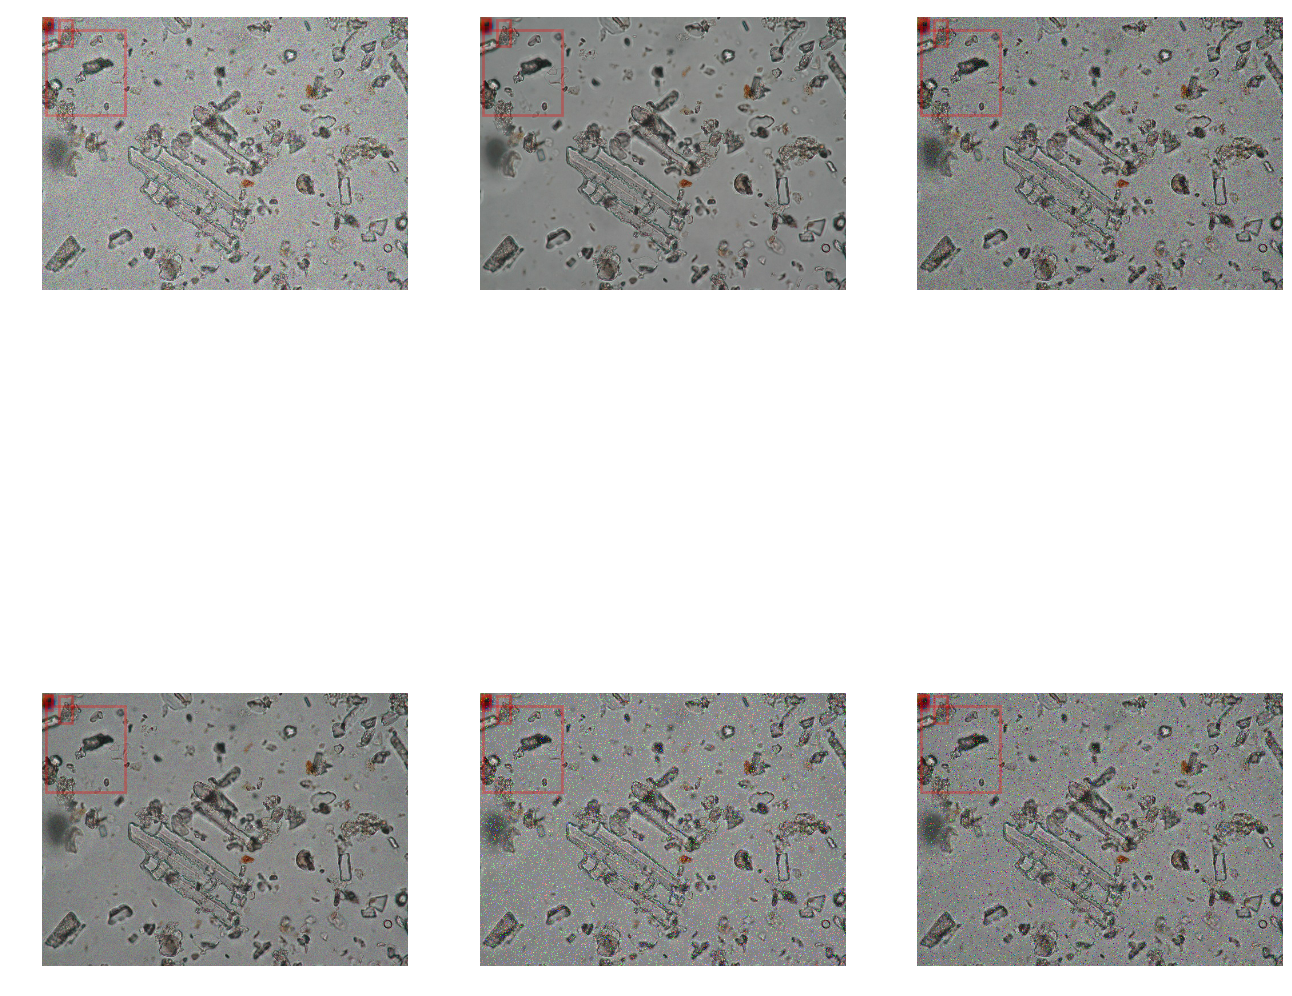

In [363]:
# Mostramos las imagenes resultantes

fig, axes = plt.subplots(ncols= 3, 
                         nrows= 2,
                         figsize=(16, 16), 
                         subplot_kw={'adjustable':'box-forced'})
axes = axes.ravel()
i=0
for ax in axes:

    ax.imshow(noise_imgs[i])
    ax.axis('off')

    for coord in coords:
        # x, y, width, height
        ax.add_patch(plt.Rectangle((coord[0], coord[1]), coord[2] - coord[0], coord[3] - coord[1], edgecolor='red',
                                  alpha=0.3, lw=2, facecolor='none'))
    i += 1